In [10]:
import numpy as np
import chipwhisperer as cw
import chipwhisperer.analyzer as cwa
import cw_ml_plugin.analyzer as cwma
from cw_plugins.analyzer.attacks.cpa_algorithms.fast_progressive import FastCPAProgressive
from cw_ml_plugin.analyzer.attacks.aecpa import AECPA
from cw_ml_plugin.analyzer.attacks.daecpa import DAECPA
from cw_ml_plugin.analyzer.preprocessing.convolve import Convolve

project_path = "/home/members/morita/side_channel_attack/cw_ml_plugin/experiment_data/sakura_x_traces/cpa_sakura_40000_traces.cwp"
proj = cw.open_project(project_path)

In [27]:
convolve = Convolve(proj)
vector_length = 10
w = np.arange(vector_length)
w = np.exp(w)
# w = w / np.sum(w)
convolve.convolve_mode = 'valid'
convolve.weight_vector = w[::-1]

convolve_proj = convolve.preprocess()

100%|██████████| 40000/40000 [00:05<00:00, 7136.77it/s]


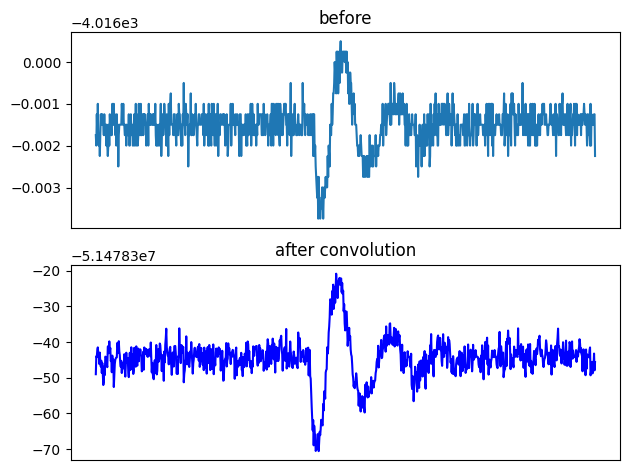

---------- Finish standardization ---------


In [28]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1)
axs[0].plot(proj.waves[0][18000:19000])
axs[0].set_title("before")
axs[0].tick_params(axis='x', which='both', bottom=False, right=False, labelbottom=False)
axs[1].plot(convolve_proj.waves[0][18000:19000], color = 'b')
axs[1].set_title("after convolution")
axs[1].tick_params(axis='x', which='both', bottom=False, right=False, labelbottom=False)
plt.tight_layout()
plt.show()
print("---------- Finish standardization ---------")